In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom

## **1. Realizar un análisis estadístico del dataset: '1_dataset_illness.csv'. Determinar las variables categóricas, discretas y continuas. Calcular medidas estadísticas. Gráficar distribuciones en forma de gráficos de barras o histogramas según corresponda.**

In [5]:
# leer el dataset
df = pd.read_csv('./1_dataset_illness.csv')
df.head()



,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367,0
1,2,Dallas,Male,54,45084,0
2,3,Dallas,Male,42,52483,0
3,4,Dallas,Male,40,40941,0
4,5,Dallas,Male,46,50289,0


In [4]:
# cuantas filas y columnas tiene el dataset
df.shape

(150000, 6)

- Variables Categoricas
- Variables Discretas
- Variables Continuas

In [15]:
categorical_variable = ['City', 'Gender', 'Illness']
discrete_variable = ['Age', 'Number']
continuous_variable = ['Income']

- Calcular medias estadísticas

In [20]:
df[discrete_variable].mean()


Age          44.9502
Number    75000.5000
dtype: float64

In [19]:
df[continuous_variable].mean()

Income    91252.798273
dtype: float64

In [32]:
# cuantas personas tienen la enfermedad 
df['Illness'].value_counts()

Illness
0    137861
1     12139
Name: count, dtype: int64

In [7]:
# Agrupamos por ciudad y miramos los ingresos 
df.groupby('City')['Income'].describe()


,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Austin,12292.0,90277.513423,10996.636090,50602.0,82891.75,90278.5,97755.5,132302.0
Boston,8301.0,91554.571497,11216.142107,48425.0,83892.00,91607.0,99110.0,132348.0
Dallas,19707.0,45252.231187,11263.867909,-654.0,37720.50,45268.0,53021.5,91479.0
Los Angeles,32173.0,95264.155410,11187.234580,51131.0,87589.00,95291.0,102935.0,141249.0
Mountain View,14219.0,135078.415782,11227.302304,95202.0,127482.00,135220.0,142738.5,177157.0
New York City,50307.0,96857.131393,11210.580111,55538.0,89184.00,96920.0,104516.5,147170.0
San Diego,4881.0,100756.209178,11149.283188,64941.0,93193.00,100859.0,108394.0,140190.0
Washington D.C.,8120.0,70991.612808,11079.854228,33335.0,63571.75,71230.0,78563.5,107704.0


In [8]:
# agrupamos por ciudad y miramos los ingresos y la edad
df.groupby('City')[['Income', 'Age']].describe()

Income                                                   \
                   count           mean           std      min        25%   
City                                                                        
Austin           12292.0   90277.513423  10996.636090  50602.0   82891.75   
Boston            8301.0   91554.571497  11216.142107  48425.0   83892.00   
Dallas           19707.0   45252.231187  11263.867909   -654.0   37720.50   
Los Angeles      32173.0   95264.155410  11187.234580  51131.0   87589.00   
Mountain View    14219.0  135078.415782  11227.302304  95202.0  127482.00   
New York City    50307.0   96857.131393  11210.580111  55538.0   89184.00   
San Diego         4881.0  100756.209178  11149.283188  64941.0   93193.00   
Washington D.C.   8120.0   70991.612808  11079.854228  33335.0   63571.75   

                                                   Age                        \
                      50%       75%       max    count       mean        std   
City                                                                           
Austin            90278.5   97755.5  132302.0  12292.0  44.651237  11.556520   
Boston            91607.0   99110.0  132348.0   8301.0  45.197807  11.717700   
Dallas            45268.0   53021.5   91479.0  19707.0  45.058761  11.577818   
Los Angeles       95291.0  102935.0  141249.0  32173.0  44.994094  11.570711   
Mountain View    135220.0  142738.5  177157.0  14219.0  44.992756  11.562080   
New York City     96920.0  104516.5  147170.0  50307.0  44.922118  11.560419   
San Diego        100859.0  108394.0  140190.0   4881.0  44.965171  11.578970   
Washington D.C.   71230.0   78563.5  107704.0   8120.0  44.802709  11.523860   

                                               
                  min   25%   50%   75%   max  
City                                           
Austin           25.0  35.0  44.0  54.0  65.0  
Boston           25.0  35.0  45.0  55.0  65.0  
Dallas           25.0  35.0  45.0  55.0  65.0  
Los Angeles      25.0  35.0  45.0  55.0  65.0  
Mountain View    25.0  35.0  45.0  55.0  65.0  
New York City    25.0  35.0  45.0  55.0  65.0  
San Diego        25.0  35.0  45.0  55.0  65.0  
Washington D.C.  25.0  35.0  45.0  55.0  65.0

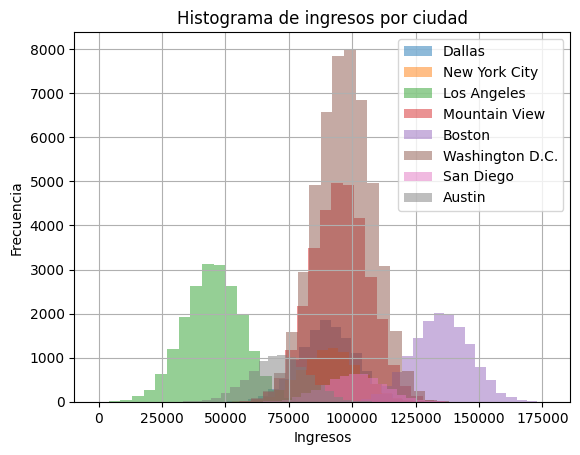

In [13]:
# Realizamos un histograma de los ingresos por ciudad
df.groupby('City')['Income'].hist(alpha=0.5, bins=20)
# ahora ponemos un titulo y etiquetas
plt.title('Histograma de ingresos por ciudad')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.legend(df.City.unique())
plt.show()


## **2. Lleva seis meses en el cargo de gerente de riesgos de una empresa de seguros. La junta directiva muestra su precupación por el aumento de cargos ('charges') monetarios de los que es sujeto la empresa por coberturas de los clientes asegurados. ¿Que propondrías como estrategia de manejo de riesgos, para reducir el monto total por cargos de coberturas? Para esto utilizar el archivo '1_dataset_insurance.csv'.**


In [33]:
df_insurance = pd.read_csv('./1_dataset_insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df_insurance.shape

(1338, 7)

In [35]:
# cuantas regiones existen y su conteo
df_insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [37]:
# cuantas personas fuman y su conteo
df_insurance['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [38]:
# cuantos hijos
df_insurance['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [41]:
# agrupar por region y charges para saber el promedio de gastos por region
df_insurance.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

<Axes: xlabel='region'>

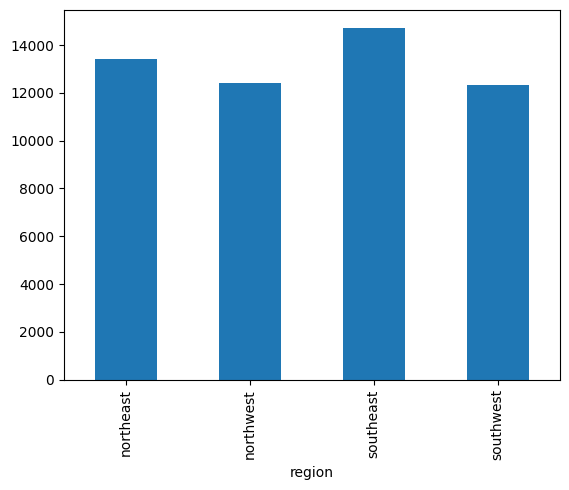

In [40]:

# graficar el promedio de gastos por region
df_insurance.groupby('region')['charges'].mean().plot(kind='bar')

In [42]:
# como en southwest hay mas personas fumadoras, vamos a ver el promedio de gastos por region y fumadores
df_insurance.groupby(['region', 'smoker'])['charges'].mean()


region     smoker
northeast  no         9165.531672
           yes       29673.536473
northwest  no         8556.463715
           yes       30192.003182
southeast  no         8032.216309
           yes       34844.996824
southwest  no         8019.284513
           yes       32269.063494
Name: charges, dtype: float64

<Axes: xlabel='region,smoker'>

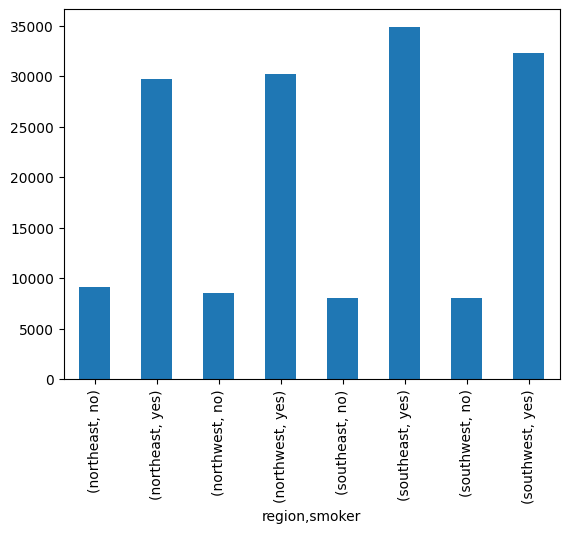

In [43]:
# realizamos la grafica anterior
df_insurance.groupby(['region', 'smoker'])['charges'].mean().plot(kind='bar')

In [44]:
# edad con la media más alta por charges
df_insurance.groupby('age')['charges'].mean().sort_values(ascending=False).head(1)
# se identifica que la edad con la media más alta es 64 años

age
64    23275.530837
Name: charges, dtype: float64

<Axes: xlabel='age'>

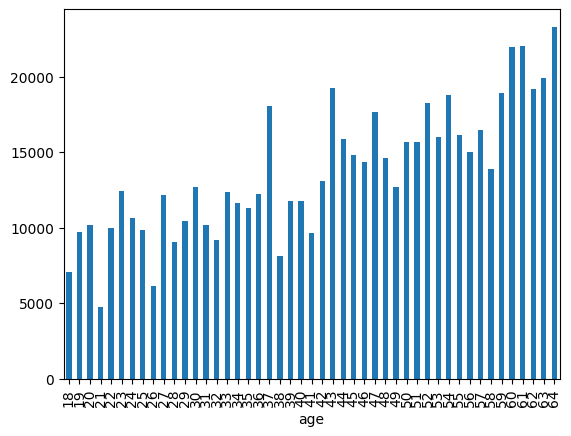

In [46]:
# grafico de edad con los charges
df_insurance.groupby('age')['charges'].mean().plot(kind='bar')


In [47]:
# saber si la gente fumadora tiene mas hijos
df_insurance.groupby('smoker')['children'].mean()

smoker
no     1.090226
yes    1.113139
Name: children, dtype: float64

In [48]:
# Sabiendo que los fumadores tienen mas hijos, vamos a ver si los fumadores tienen mas gastos
df_insurance.groupby('smoker')['charges'].mean()


smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

<p>Se identifica que los fumadores tienen mas gastos por ello se puede decir que los fumadores tienen mas hijos y mas gastos. </p>
</br>

<p>Podemos dar una mejor cobertura a nuestros clientes que tienen hijos para así tener una mejor ganancia y no tener tantos gastos</p>